## Riksantikvarieämbetet RAÄ -  K-samsök - Evighetsrunor 
version 1.302

* this [notebook](https://github.com/salgo60/open-data-examples/blob/master/Riksantikvarie%C3%A4mbetet%20RA%C3%84%20Evighetsrunor.ipynb)
* Phabricator [T268381](https://phabricator.wikimedia.org/T268381)
 
* [GITHUB Evighetsrunor](https://github.com/uppsala-university/Evighetsrunor) 
* get KSAMSÖK data [see API](https://www.raa.se/hitta-information/k-samsok/att-anvanda-k-samsok/metoder/)
  * example [xml](http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=2&query=serviceName=%22srdb%22&startRecord=1)  
  * supported fields?!?! itemDescription,itemLabel,lon,lat
    * missing fields in this data see [T269813 Entity schema - "Evighetsrunor" / “Everlasting Runes”](https://phabricator.wikimedia.org/T269813)
      * carver e.g. [Fot 2](https://app.raa.se/open/runor/search_results?key=carver&id=e8c2b0b6-4b1e-4ba4-a163-f5e101802618), [Ärnfast](https://app.raa.se/open/runor/search_results?key=carver&id=0d4390a7-c962-4ba7-af3c-22b7764709e0), [Torgöt Fotsarve](https://app.raa.se/open/runor/search_results?key=carver&id=ad81d51d-1ab9-4660-8097-6ba52aa0176b), [Balle](https://app.raa.se/open/runor/search_results?key=carver&id=473cf687-cd94-4128-b195-21d01e747854), [Arbjörn](https://app.raa.se/open/runor/search_results?key=carver&id=0fb56c0f-1f97-4d70-bed9-d88af20be02f), [Öpir 1](https://app.raa.se/open/runor/search_results?key=carver&id=2a1cf645-91fa-47a6-b904-5b8b56b95fb3)
      * material e.g. [granit](https://app.raa.se/open/runor/search_results?key=material&id=fa61cddc-97a8-4dd8-9333-e4f359c090da), [rödgnejsgranit](https://app.raa.se/open/runor/search_results?key=material&id=bee1a5c1-6ead-4a15-8c8d-740e7159a970), [sten](https://app.raa.se/open/runor/search_results?key=material&id=56f871f0-71e2-4e70-a2a6-530f63bb64ab), [mörk gnejs](https://app.raa.se/open/runor/search_results?key=material&id=b3502e49-3624-45fa-98dd-3202ba5a4d92), [ljus gnejsgranit](https://app.raa.se/open/runor/search_results?key=material&id=525b6580-c65a-47fc-88a2-ccc2b576ce3d), [rödgrå granit](https://app.raa.se/open/runor/search_results?key=material&id=ff332544-6da3-48f9-90c2-25b4060336e8), [blågrå granit](https://app.raa.se/open/runor/search_results?key=material&id=1c779a8f-e34a-41d9-b066-99a47f095eb8), [jotnisk sandsten](https://app.raa.se/open/runor/search_results?key=material&id=370c048e-1477-49c7-84c2-eb449488f012)....
      * dating e.g. [Viking age](https://app.raa.se/open/runor/search_results?key=period&id=81fd003d-ee5a-407e-ac0e-aa8fbf6cf91c)...
      * style e.g. [rak](https://app.raa.se/open/runor/search_results?key=style&id=d2b973c6-1eb1-4201-9bf9-a951c63deb70)
      * translation en-gb, sv [Översättning P]()

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2020-12-14 21:30:16.822771


In [2]:
# get all records just sends 500 records --> we need to loop and I guess 8000 records
import urllib3, json
import pandas as pd  
import pprint
http = urllib3.PoolManager()
urlbase = "http://kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=50&x-api=%22test%22&query=%22*%22&FORMAT=JSON&startRecord="
urlbase = "http://kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=10&x-api=%22test%22&query=serviceName=%22srdb%22&startRecord="
urlbase = "http://www.kulturarvsdata.se/ksamsok/api?method=search&query=serviceName=%22srdb%22&recordSchema=xml&fields=itemDescription,itemLabel,lon,lat&startRecord="
#urlbase = "http://www.kulturarvsdata.se/ksamsok/api?method=search&query=serviceName=%22srdb%22&fields=itemLabel,lon,lat,url"
urlbase = "http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=500&query=serviceName=%22srdb%22&recordSchema=xml&fields=itemLabel,lon,lat,url,parishName&startRecord="
pd.set_option("display.max.columns", None) 
dftot = pd.DataFrame()
pp = pprint.PrettyPrinter(indent=1)
dftot = pd.DataFrame(columns=['itemId', 'itemLabel', 'lon' ,'lat','url', 'parishName'])

#for i in range(1,5,5):
for i in range(1,8000,500):
    url = urlbase + str(i)
    print (i, url)
    r = http.request('GET', url,headers={"Accept" : 'application/json'})
    data = json.loads(r.data)
#    pp.pprint(data)
    i = 0 
    if len(data["result"]["records"]) > 0:
        for r in data["result"]["records"]["record"]:
            for f in r["field"]:
                #itemId itemLabel lon lat url parishName
                if f["name"] in 'itemId':
                   itemId =  f["content"]
                if f["name"] in 'itemLabel':
                   itemLabel =  f["content"]
                if f["name"] in 'lon':
                   lon =  f["content"]
                if f["name"] in 'lat':
                   lat =  f["content"]
                if f["name"] in 'url':
                   url =  f["content"]
                if f["name"] in 'parishName':
                   parishName =  f["content"]

            dftot = dftot.append({'itemId': itemId, 'itemLabel': itemLabel, 'lon': lon, 
                   'lat': lat, 'url': url, 'parishName' : parishName }, ignore_index=True)



1 http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=500&query=serviceName=%22srdb%22&recordSchema=xml&fields=itemLabel,lon,lat,url,parishName&startRecord=1
501 http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=500&query=serviceName=%22srdb%22&recordSchema=xml&fields=itemLabel,lon,lat,url,parishName&startRecord=501
1001 http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=500&query=serviceName=%22srdb%22&recordSchema=xml&fields=itemLabel,lon,lat,url,parishName&startRecord=1001
1501 http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=500&query=serviceName=%22srdb%22&recordSchema=xml&fields=itemLabel,lon,lat,url,parishName&startRecord=1501
2001 http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=500&query=serviceName=%22srdb%22&recordSchema=xml&fields=itemLabel,lon,lat,url,parishName&startRecord=2001
2501 http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=500&query=serviceName=%22srdb%22&recordSc

In [3]:
print(dftot.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7189 entries, 0 to 7188
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   itemId      7189 non-null   object 
 1   itemLabel   7189 non-null   object 
 2   lon         7189 non-null   float64
 3   lat         7189 non-null   float64
 4   url         7189 non-null   object 
 5   parishName  7189 non-null   object 
dtypes: float64(2), object(4)
memory usage: 337.1+ KB
None


In [4]:
dftot["kulturarvsdata"] =  dftot["itemId"].astype(str).str.replace("http://kulturarvsdata.se","")

dftot

,itemId,itemLabel,lon,lat,url,parishName,kulturarvsdata
0,http://kulturarvsdata.se/uu/srdb/2512da5a-8c0c...,"Öl Köping29, Köpings kyrka",16.71840,56.8781,https://app.raa.se/open/runor/inscription?id=2...,Köpings socken,/uu/srdb/2512da5a-8c0c-4122-b46c-834a8f9ee3a2
1,http://kulturarvsdata.se/uu/srdb/0ad9a81c-15b5...,"U 283, Torsåker (Tjursåker)",17.93190,59.5551,https://app.raa.se/open/runor/inscription?id=d...,Hammarby socken,/uu/srdb/0ad9a81c-15b5-4b38-bf4c-292e8ce7c824
2,http://kulturarvsdata.se/uu/srdb/0ae15e3f-6005...,"N 518, Værnes kirke",10.95490,63.4543,https://app.raa.se/open/runor/inscription?id=2...,Værnes sogn,/uu/srdb/0ae15e3f-6005-485d-8f7a-0122ceda2f08
3,http://kulturarvsdata.se/uu/srdb/0aeba88b-42a8...,"N 124, Ål kirke",8.55757,60.6288,https://app.raa.se/open/runor/inscription?id=2...,Ål sogn,/uu/srdb/0aeba88b-42a8-4088-b3a9-dda45ed98555
4,http://kulturarvsdata.se/uu/srdb/0d166a6c-476e...,"N A85, Kaupanger kirke",7.23340,61.1842,https://app.raa.se/open/runor/inscription?id=4...,Kaupanger sogn,/uu/srdb/0d166a6c-476e-4ba4-a0cd-434873d2484c
...,...,...,...,...,...,...,...
7184,http://kulturarvsdata.se/uu/srdb/fda1ef7f-c940...,"DR 129, Durup",9.63083,56.7035,https://app.raa.se/open/runor/inscription?id=2...,Durup sogn,/uu/srdb/fda1ef7f-c940-4e77-ac5b-60f8192b4a33
7185,http://kulturarvsdata.se/uu/srdb/fda7958c-cb57...,"N B501, Gullskoen, Bryggen, Bergen",5.32341,60.3974,https://app.raa.se/open/runor/inscription?id=d...,Bergen,/uu/srdb/fda7958c-cb57-4e33-8524-7a1a20545b55
7186,http://kulturarvsdata.se/uu/srdb/fde7a05b-ce80...,"N 661, Gullskoen, Bryggen, Bergen",5.32341,60.3974,https://app.raa.se/open/runor/inscription?id=9...,Bergen,/uu/srdb/fde7a05b-ce80-456b-8eae-8370b539a4a8
7187,http://kulturarvsdata.se/uu/srdb/fecc9ad2-2186...,"U 526, Frötuna kyrka",18.67500,59.7415,https://app.raa.se/open/runor/inscription?id=4...,Frötuna socken,/uu/srdb/fecc9ad2-2186-42a4-9ab5-f8eed687897c


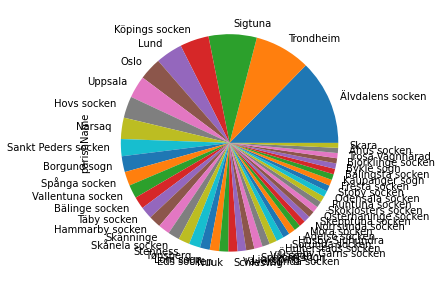

In [5]:
# Plot parishNames feels odd data and strings... maybe better to ask Evighetsrunor --> 
# looks like they have an internal id for the parish
# Hovs socken = WD Q10526719 --> https://app.raa.se/open/runor/search_results?key=parish&id=731b06b7-8bb4-43bb-8031-fb788ae7c14e
# Hovs socken = WD Q10526721 --> https://app.raa.se/open/runor/search_results?key=parish&id=a591aadf-687d-4e37-9d44-178d30a949f7
plot = dftot["parishName"].value_counts()[1:50].plot.pie(y='counts', figsize=(5, 5))  

In [6]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2020-12-14 21:31:31.329999
Time elapsed (hh:mm:ss.ms) 0:01:14.507643


In [7]:
#can we create a Graph guess we should have more fields

In [8]:
import networkx as nx
G = nx.Graph()

In [9]:
G = nx.from_pandas_edgelist(dftot[1:40], 'itemLabel', 'parishName')

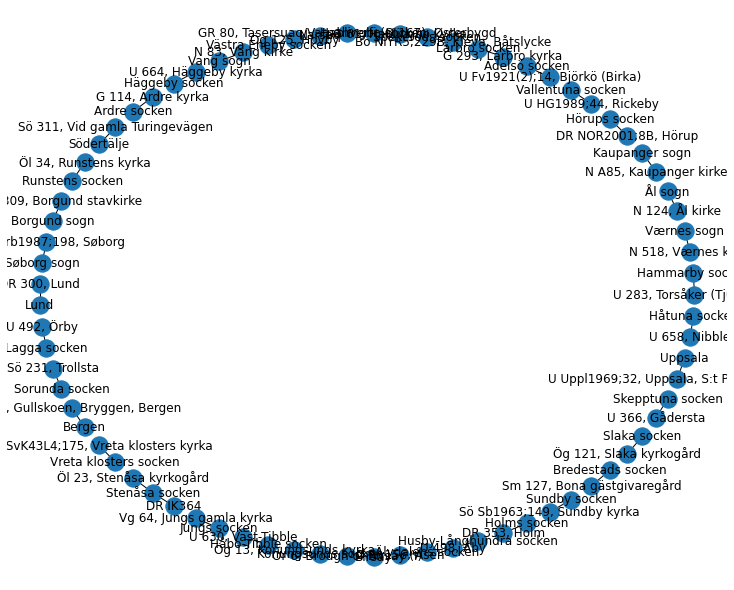

In [10]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

In [11]:
dfHovs = dftot[dftot["parishName"].str.contains("Hovs socken")]
dfHovs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 90 to 6901
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   itemId          71 non-null     object 
 1   itemLabel       71 non-null     object 
 2   lon             71 non-null     float64
 3   lat             71 non-null     float64
 4   url             71 non-null     object 
 5   parishName      71 non-null     object 
 6   kulturarvsdata  71 non-null     object 
dtypes: float64(2), object(5)
memory usage: 4.4+ KB


In [12]:
pd.set_option("max_colwidth", None)  
pd.set_option('display.max_rows', None)
dfHovs

,itemId,itemLabel,lon,lat,url,parishName,kulturarvsdata
90,http://kulturarvsdata.se/uu/srdb/9ab04996-c5df-480d-b573-ba10419a71d2,"Ög Hov90;32, Hovs kyrka",14.9181,58.3788,https://app.raa.se/open/runor/inscription?id=c5ce4e06-8c17-4fa5-8027-4ea020ba511e,Hovs socken,/uu/srdb/9ab04996-c5df-480d-b573-ba10419a71d2
231,http://kulturarvsdata.se/uu/srdb/f313c038-6a1d-4f0d-9850-466fc9611bc6,"Ög Hov98-99;36, Hovs kyrka",14.9181,58.3788,https://app.raa.se/open/runor/inscription?id=d6e542a2-cba9-47e7-b30f-3c558038b98b,Hovs socken,/uu/srdb/f313c038-6a1d-4f0d-9850-466fc9611bc6
281,http://kulturarvsdata.se/uu/srdb/048a8225-a806-4b64-928d-a2c880e935f2,"Ög Hov;7, Hovs kyrka",14.9181,58.3788,https://app.raa.se/open/runor/inscription?id=823720d4-ae11-4491-83a2-c38a8e1f8c39,Hovs socken,/uu/srdb/048a8225-a806-4b64-928d-a2c880e935f2
301,http://kulturarvsdata.se/uu/srdb/0630713b-469c-4e15-8749-e20c38aa89c8,"Ög ATA6577/62C, Hovs kyrka",14.9181,58.3788,https://app.raa.se/open/runor/inscription?id=069a00b2-9979-4648-bcc4-128837b03c3c,Hovs socken,/uu/srdb/0630713b-469c-4e15-8749-e20c38aa89c8
392,http://kulturarvsdata.se/uu/srdb/122ec4eb-70c7-4269-83e2-1723ff144c4c,"Ög Hov92;33, Hovs kyrka",14.9181,58.3788,https://app.raa.se/open/runor/inscription?id=71594f85-a0b8-4b14-90a3-a9a8e3f3bb51,Hovs socken,/uu/srdb/122ec4eb-70c7-4269-83e2-1723ff144c4c
561,http://kulturarvsdata.se/uu/srdb/26f57714-02f8-4938-871a-b180cf804767,"Ög Hov94;34, Hovs kyrka",14.9181,58.3788,https://app.raa.se/open/runor/inscription?id=a057a812-d5e5-466c-9b5c-e2fc66c5c55f,Hovs socken,/uu/srdb/26f57714-02f8-4938-871a-b180cf804767
708,http://kulturarvsdata.se/uu/srdb/3aa701a1-6575-4a1c-8163-1bee34804fc1,"Ög HovRaä50, Furåsa",14.9160,58.3540,https://app.raa.se/open/runor/inscription?id=adb3776f-4eab-47e9-a15e-cd3922816305,Hovs socken,/uu/srdb/3aa701a1-6575-4a1c-8163-1bee34804fc1
711,http://kulturarvsdata.se/uu/srdb/3b01103d-da15-4459-9117-6154bf0b39e2,"Ög Hov1;14, Hovs kyrka",14.9181,58.3788,https://app.raa.se/open/runor/inscription?id=c43c6fc6-d056-4dd7-b7a3-dc2e6a2441dd,Hovs socken,/uu/srdb/3b01103d-da15-4459-9117-6154bf0b39e2
826,http://kulturarvsdata.se/uu/srdb/4b053080-c575-4fe5-81a5-010855bc8908,"Ög Hov91;33, Hovs kyrka",14.9181,58.3788,https://app.raa.se/open/runor/inscription?id=e0e26a59-4a33-4dc2-bb13-db678dfc5049,Hovs socken,/uu/srdb/4b053080-c575-4fe5-81a5-010855bc8908
1060,http://kulturarvsdata.se/uu/srdb/69845692-da5b-4e71-b3a2-eea2e9657b94,"Ög Hov34;28, Hovs kyrka",14.9181,58.3788,https://app.raa.se/open/runor/inscription?id=4aa8dc1f-766e-44a0-b951-a029f6755970,Hovs socken,/uu/srdb/69845692-da5b-4e71-b3a2-eea2e9657b94


### Rundata -  bad semantic interoperability 
* about [Rundata.info introduction](https://rundata.info/about/)

Looks like the Signum is an candidate for **same as** but the data hos no unique identifier or no [semantic interoperability](https://en.wikipedia.org/wiki/Semantic_interoperability#:~:text=Semantic%20interoperability%20is%20the%20ability,data%20federation%20between%20information%20systems.) with Evighetsrunor i.e. we have 2 SILOS....
* text strings
  * Socken we have a column with mixed values and one part "Sockenkod"
  * Härad
  * Kommun

In [13]:
import pandas as pd 
rundatadf = pd.read_excel("data/RUNDATA.xls")

rundatadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11671 entries, 0 to 11670
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Signum                     11671 non-null  object
 1   Plats                      6622 non-null   object
 2   Socken                     6412 non-null   object
 3   Härad                      5530 non-null   object
 4   Kommun                     6399 non-null   object
 5   Placering                  3766 non-null   object
 6   Koordinater                5198 non-null   object
 7   Urspr. plats?              1101 non-null   object
 8   Nuv. koord.                501 non-null    object
 9   Sockenkod/Fornlämningsnr.  4592 non-null   object
 10  Runtyper                   333 non-null    object
 11  Korsform                   1119 non-null   object
 12  Period/Datering            6748 non-null   object
 13  Stilgruppering             2587 non-null   object
 14  Ristar

In [14]:
rundatadf.sample(100)

,Signum,Plats,Socken,Härad,Kommun,Placering,Koordinater,Urspr. plats?,Nuv. koord.,Sockenkod/Fornlämningsnr.,Runtyper,Korsform,Period/Datering,Stilgruppering,Ristare,Materialtyp,Material,Föremål,Övrigt,Alternativt signum,Referens,Bildlänk
8038,DK SlB16 =DR_Schl16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5759,N 675 M,"Nordre Søstergården, Bryggen, Bergen",Bergen,NaN,Bergen,BRM 0/79607,NaN,NaN,NaN,NaN,NaN,NaN,M efter 1170,NaN,NaN,trä,trä,märklapp,NaN,N B555,B555,http://www.nb.no/baser/runer/runebilder/b555.jpg
1620,Vg 237 M,"Lödöse, Kroken 1:59, klostret",Sankt Peders sn,Ale hd,Lilla Edet,Göteborgs hist. mus. (Lödöse 1918:1407),6440175.1284450,NaN,NaN,"1763 (Sankt Peder), 23 (stadslager) [objektid=10176300230001]",NaN,NaN,M 1200-t,NaN,NaN,övrigt,tegel,tegelstensfragment,NaN,NaN,NaN,NaN
8172,DK Sk122 =DR_EM85;434L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2524,U 817 †,Bälsunda,Hjälsta sn,Lagunda hd,Enköping,NaN,6617450.1592575,NaN,NaN,0236 (Hjälsta),NaN,NaN,V,Pr3?,Arbjörn (A) [Stille 1999b],sten,NaN,runsten,NaN,L 766,NaN,NaN
3795,G 274 M,Lunds,Tingstäde sn,Lummelunda ting,Gotland,Gotlands museum,6407113.1667071,NaN,NaN,"0969 (Tingstäde), 149:4 [objektid=10096901490004]",NaN,NaN,M senmedeltid?,NaN,NaN,sten,NaN,fragment av runsten eller gravhäll,NaN,NaN,NaN,NaN
3716,G 196 M,Tofta kyrka,Tofta sn,Banda ting,Gotland,Vid altaret.,6379835.1641605,NaN,NaN,0970 (Tofta),NaN,NaN,M efter 1347,NaN,NaN,sten,kalksten,gravhäll,På samma gravhäll finns G 195. Även majuskelinskrift.,NaN,NaN,NaN
9163,B 565 =U_1143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6096,N A132 M,"Folkebibliotekstomta, Trondheim",Trondheim,Sør-Trøndelag fylke,Trondheim,"Vitenskapsmuseet, NTNU (N-22767b)",(63.4305 ; 10.4010),NaN,NaN,NaN,NaN,NaN,M 1175-1275,NaN,NaN,trä,trä,pinne,NaN,N 879,N 879 (manus till NIyR bind 7 av J.R. Hagland),NaN
1731,U 28,Hilleshögs kyrka,Hilleshögs sn,Färentuna hd,Ekerö,NaN,6587108.1607796,NaN,NaN,"0029 (Hilleshög), 38:7 [objektid=10002900380007]",NaN,NaN,V,?,NaN,sten,sandsten,fragment av runsten,Eventuellt en bit av U 24.,NaN,NaN,NaN


In [15]:
rundatadf["Sockenkod/Fornlämningsnr."].value_counts()[1:50]  
rundatadf["Signum"].value_counts()[1:50]  
rundatadf["Plats"].value_counts()[1:50]  
rundatadf["Socken"].value_counts()[1:50]  


Trondheim                                 177
Sigtuna                                   141
Köpings sn                                 87
Lund                                       82
Hovs sn                                    68
Oslo                                       68
?                                          60
Sankt Peders sn                            52
Borgund sn                                 50
Uppsala                                    48
Vallentuna sn                              43
Täby sn                                    39
Bälinge sn                                 38
Skånela sn                                 37
Tønsberg                                   36
Hammarby sn                                36
Spånga sn                                  35
Skänninge                                  34
Lom sn                                     32
Eds sn                                     29
Stadt Schleswig                            29
Väversunda sn                     

In [16]:
rundatadf["Ristare"].value_counts()[1:50]  

Öpir 1 (S)                            43
Balle (A)                             37
Gunnar (A)                            31
Åsmund (A)                            31
Öpir 1 (A)                            29
Visäte (A)                            24
Traen (A)                             22
Balle (S)                             21
Halvdan (A)                           17
Erik (A)                              16
Åsmund (S)                            15
Arbjörn (A)                           13
Jakob Rød                             12
Balle (A) [Stille 1999b]              11
Livsten (A)                           10
Tore 1 (A)                             9
Amunde (A)                             8
Torbjörn 2 (A)                         8
Visäte (S)                             7
Björn 2 eller -björn (A)               6
Likbjörn (A)                           6
Grim skald (A)                         6
(Öpir 1 (A)) [ej Öpir, Åhlén 1997]     5
Torbjörn 2 (A) [Stille 1999b]          5
Fot 2 (S)       

In [17]:
rundatadf["Runtyper"].value_counts()[1:50]  

norska                                                                                                               33
kortkvist-s                                                                                                          12
stungen m-runa                                                                                                        9
Helnæs-Gørlev                                                                                                         9
kvistrunor                                                                                                            7
långkvist                                                                                                             6
långkvist och lönnrunor (kvistrunor)                                                                                  6
stavlösa                                                                                                              6
vändrunor                               

In [18]:
rundatadf["Korsform"].value_counts()[1:50] 

A1; B1; C8, C9; D1; 0; F3; 0        13
A1; B1; C8; D1; 0; F3; 0            13
A4; B3; C1; D1; E3; F3; 0           13
A1; B1; C9; D1; 0; F3; 0            12
A1; B1; C6, C7; D1; 0; F3; 0        11
A3; B1; 0; D1; E3; F3; 0            10
A3; B1; C8; D1; E3; F3; 0           10
A4; B1; 0; D1; E3; F3; 0            10
A1; B2; 0; D1; 0; F3; 0              9
A1; B2; C6, C7; D1; 0; F3; 0         9
A1; B3; 0; D1; 0; F3; 0              7
A4; B1; 0; D1; 0; F3; 0              7
A3; B1; C6, C7; D1; E3; F3; 0        6
A1; B1; 0; D1; E7; F3; 0             6
A5; B1; 0; D1; 0; F3; 0              6
A5; B1; C9; D1; 0; F3; 0             6
A2; B1; C6, C7; D1; 0; F3; 0         6
A1; B1; 0; D3; 0; F3; 0              6
A2; B1; 0; D1; 0; F3; 0              5
A1; B1; C6, C7, C9; D1; 0; F3; 0     5
A4; B1; C6, C7; D1; E3; F3; 0        5
A1; B1; C8; D1; 0; F2; 0             5
A1; B1; 0; D1; 0; F2; 0              5
A1; B1; 0; D1; E9; F3; 0             4
A1; B1; C9, C10; D1; 0; F3; 0        4
A1; B2; C9, C10; D1; 0; F

In [19]:
rundatadf["Period/Datering"].value_counts()[1:50]   


M                                1499
V 1065-1075                       128
U 400-650                         104
V efter-Jelling                    90
M 1100-t                           68
M ca 1200                          59
M 1300-t                           57
M 1200-t                           52
M?                                 52
V 1000-t                           45
V 1050-1150                        42
M s 1100-t                         40
M m 1100-t                         36
V/M                                35
V ca 1100                          34
?                                  33
M ca 1300                          31
V?                                 30
V Jelling                          30
M före 1248                        29
U                                  29
V 1000-1150                        28
M före 1332                        24
M 1200-1250                        24
M 1225-1275                        24
V s 1000-t                         24
M 1150-1200 

In [20]:
rundatadf["Materialtyp"].value_counts()[1:50] 

trä         1274
metall       637
ben/horn     394
puts         218
övrigt        57
okänd          1
Name: Materialtyp, dtype: int64